In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
mvid = pd.read_csv("MVID_101001_171001.txt")
sber = pd.read_csv("SBER_101001_171001.txt")

In [184]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [185]:
a = pd.merge(sber, mvid, on='<DATE>')

In [186]:
a.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [187]:
x = a['<CLOSE>_x']
y = a['<CLOSE>_y']

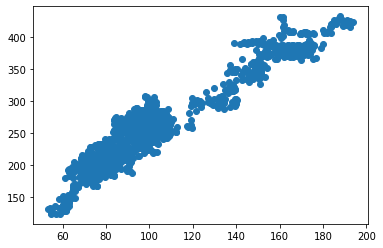

In [188]:
plt.figure()
plt.scatter(x, y)

In [189]:
class Hypothesis:
    """Модель парной регрессии"""

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def BGD(self, X, Y):
        alpha = 0.00005
        d0 = sum(self.predict(X) - Y) / len(X)
        d1 = (sum(self.predict(X) - Y) * X) / len(X)

        self.b0 -= alpha * d0
        self.b1 -= alpha * d1

In [190]:
hyp = Hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
print("initial error:", hyp.error(x, y))

0
0
initial error: 36271.58344889084


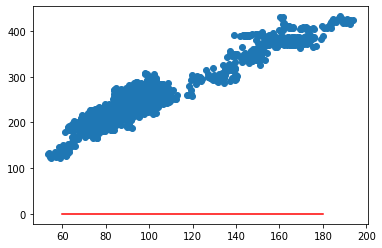

In [191]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()


In [192]:
# hyp.BGD(x, y)
# J = hyp.error(x, y)
# print("error after gradient descent:", J)
#
# X0 = np.linspace(55, 195, 100)
# # X0 = np.linspace(60, 180, 100)
# Y0 = hyp.predict(X0)
#
# plt.figure()
# plt.scatter(x, y)
# plt.plot(X0, Y0, 'r')
# plt.show()

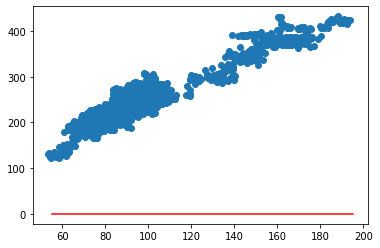

In [193]:
class hypothesis():
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):
        """MSE"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def BGD(self, X, Y, alpha = 0.00005):
        dJ0 = sum(self.predict(X) - Y) / len(X)
        dJ1 = sum((self.predict(X) - Y) * X) / len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

reg = hypothesis()
X0 = np.linspace(55, 195, 100)
Y0 = reg.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [194]:
class Hypothesis:
    """Модель парной регрессии"""

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step < max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [195]:
hyp = Hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


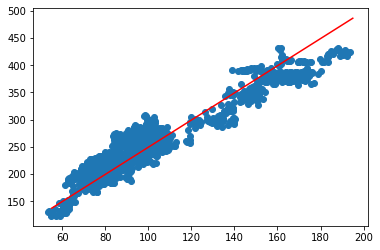

In [196]:
X0 = np.linspace(55, 195, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()


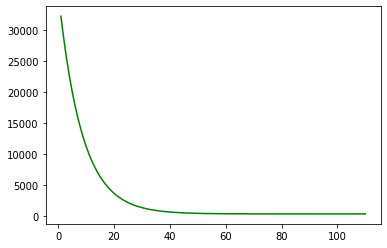

In [197]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# Доп задания

# 1. Реализуйте механизм адаптивной скорости обучения.

### При достижении 3/4 максимального количества шагов, размер нашего шага уменьшается

In [198]:
class Hypothesis:
    """Модель парной регрессии"""

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0

        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step < max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if step >= 3*max_steps/4:
                alpha = 0.00005
        return steps, errors

error after gradient descent: 298.76881676471504


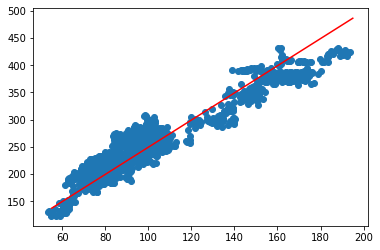

In [199]:
hyp3 = Hypothesis()
steps, errors = hyp3.BGD(x, y)
J = hyp3.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(55, 195, 100)
Y0 = hyp3.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [200]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
#
# rate = 0.01 # learning rate
# def da(y,y_p,x):
#     return (y-y_p)*(-x)
#
# def db(y,y_p):
#     return (y-y_p)*(-1)
# def calc_loss(a,b,x,y):
#     tmp = y - (a * x + b)
#     tmp = tmp ** 2 # квадрат каждого элемента в матрице
#     SSE = sum(tmp) / (2 * len(x))
#     return SSE
# def draw_hill(x,y):
#     a = np.linspace(-20,20,100)
#     print(a)
#     b = np.linspace(-20,20,100)
#     x = np.array(x)
#     y = np.array(y)
#
#     allSSE = np.zeros(shape=(len(a),len(b)))
#     for ai in range(0,len(a)):
#         for bi in range(0,len(b)):
#             a0 = a[ai]
#             b0 = b[bi]
#             SSE = calc_loss(a=a0,b=b0,x=x,y=y)
#             allSSE[ai][bi] = SSE
#
#     a,b = np.meshgrid(a, b)
#
#     return [a,b,allSSE]
# x = [30    ,35,37,    59,    70,    76,    88,    100]
# y = [1100,    1423,    1377,    1800,    2304,    2588,    3495,    4839]
#
#  # Нормализация данных
# x_max = max(x)
# x_min = min(x)
# y_max = max(y)
# y_min = min(y)
#
# for i in range(0,len(x)):
#     x[i] = (x[i] - x_min)/(x_max - x_min)
#     y[i] = (y[i] - y_min)/(y_max - y_min)
#
# [ha,hb,hallSSE] = draw_hill(x,y)
# hallSSE = hallSSE.T
# a = 10.0
# b = -20.0
# fig = plt.figure(1, figsize=(12, 8))
# fig.suptitle('learning rate: %.2f method: Nesterov momentum'%(rate), fontsize=15)
#
#
#  # Нарисуйте поверхность рисунка 1
# ax = fig.add_subplot(2, 2, 1, projection='3d')
# ax.set_top_view()
# ax.plot_surface(ha, hb, hallSSE, rstride=2, cstride=2, cmap='rainbow')
#
#  # Нарисуйте контурную карту рисунка 2
# plt.subplot(2,2,2)
# ta = np.linspace(-20, 20, 100)
# tb = np.linspace(-20, 20, 100)
# plt.contourf(ha,hb,hallSSE,15,alpha=0.5,cmap=plt.cm.hot)
# C = plt.contour(ha,hb,hallSSE,15,colors='black')
# plt.clabel(C,inline=True)
# plt.xlabel('a')
# plt.ylabel('b')
#
# plt.ion() # iteration on
#
# all_loss = []
# all_step = []
# last_a = a
# last_b = b
# va = 0
# vb = 0
# gamma = 0.9
# kd_damp=2.0
# plt.show()

# 3. Модифицируйте класс регрессии так, чтобы он проводил обучение только на случайно выделенной части данных (обучающей выборке). Историю динамики ошибки отслеживать отдельно по обучающей и по тестовой выборке.


### В данном случае нам нужно просто добавить ограничение на считывание количества наших данных

In [201]:
import random


class Hypothesis:
    """Модель парной регрессии"""

    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.data_size = random.randint(70, 80) / 100

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        data_train_last_pos = round(len(X) * self.data_size)
        data_test_first_pos = len(X) - data_train_last_pos

        X_train = X[:data_train_last_pos]
        Y_train = Y[:data_train_last_pos]

        X_test = X[data_test_first_pos:]
        Y_test = Y[data_test_first_pos:]
        return sum((self.predict(X_train) - Y_train) ** 2) / (2 * len(X_train))

    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0

        X_data = X.copy()
        Y_data = Y.copy()

        data_train_last_pos = round(len(X_data) * self.data_size)
        data_test_first_pos = len(X_data) - data_train_last_pos

        X_train = X_data[:data_train_last_pos]
        Y_train = Y_data[:data_train_last_pos]

        X_test = X_data[data_test_first_pos:]
        Y_test = Y_data[data_test_first_pos:]


        X = X_train
        Y = Y_train

        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step < max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

error after gradient descent: 163.8014094735312


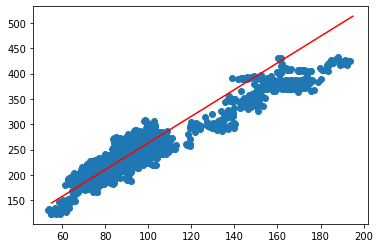

In [202]:
hyp = Hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(55, 195, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# 4. Научиться использовать библиотеку sklearn для построения парной линейной регрессии

### Добавляем модель при помощи sklearn

In [203]:
from sklearn.linear_model import LinearRegression

In [204]:
reg = LinearRegression().fit(np.array(x).reshape(-1, 1), np.array(y))

### Смотрим полученные коэффициенты

In [205]:
print(reg.intercept_, reg.coef_)

56.0111286853157 [1.99635191]


### Сторим график

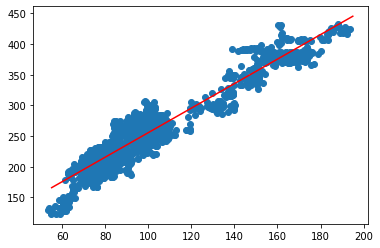

In [211]:
X0_sk = np.linspace(55, 195, 100).reshape(-1, 1)
Y0_sk = reg.predict(X0_sk)

plt.figure()
plt.scatter(x, y)
plt.plot(X0_sk, Y0_sk, 'r')
plt.show()

### А теперь посмотрим коэффициенты нашей модели

In [212]:
print(hyp.b0, hyp.b1)

0.029441262043447002 2.6317044457840075


### График нашей модели

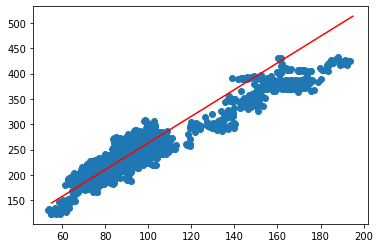

In [213]:
X0 = np.linspace(55, 195, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

### Как мы можем видеть наша модель менее точна